In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = "/home/ronald/Documents/Physics_classes/Classes/Labs/Python_macros/Pendulum/data.xlsx"
data = pd.read_excel(data)
print(data)

   L (m)  Delta L (m)  T (s)  Delta T (s)
0   0.10         0.01   0.65         0.01
1   0.15         0.01   0.79         0.01
2   0.20         0.01   0.90         0.01
3   0.25         0.01   1.01         0.01
4   0.30         0.01   1.10         0.01
5   0.35         0.01   1.20         0.01
6   0.40         0.01   1.27         0.01


Slope (a): 3.993048239020501 ± 0.07134113123021367
Intercept (b): 0.021601823633292588 ± 0.01619531279338536
Residuals: 0    0.122566
1    0.224110
2   -0.567304
3    0.011689
4   -0.432559
5    0.867971
6   -0.233115
dtype: float64
g exp:  ( 9.886787046189436 ± 0.17664063389336776 )m/s²


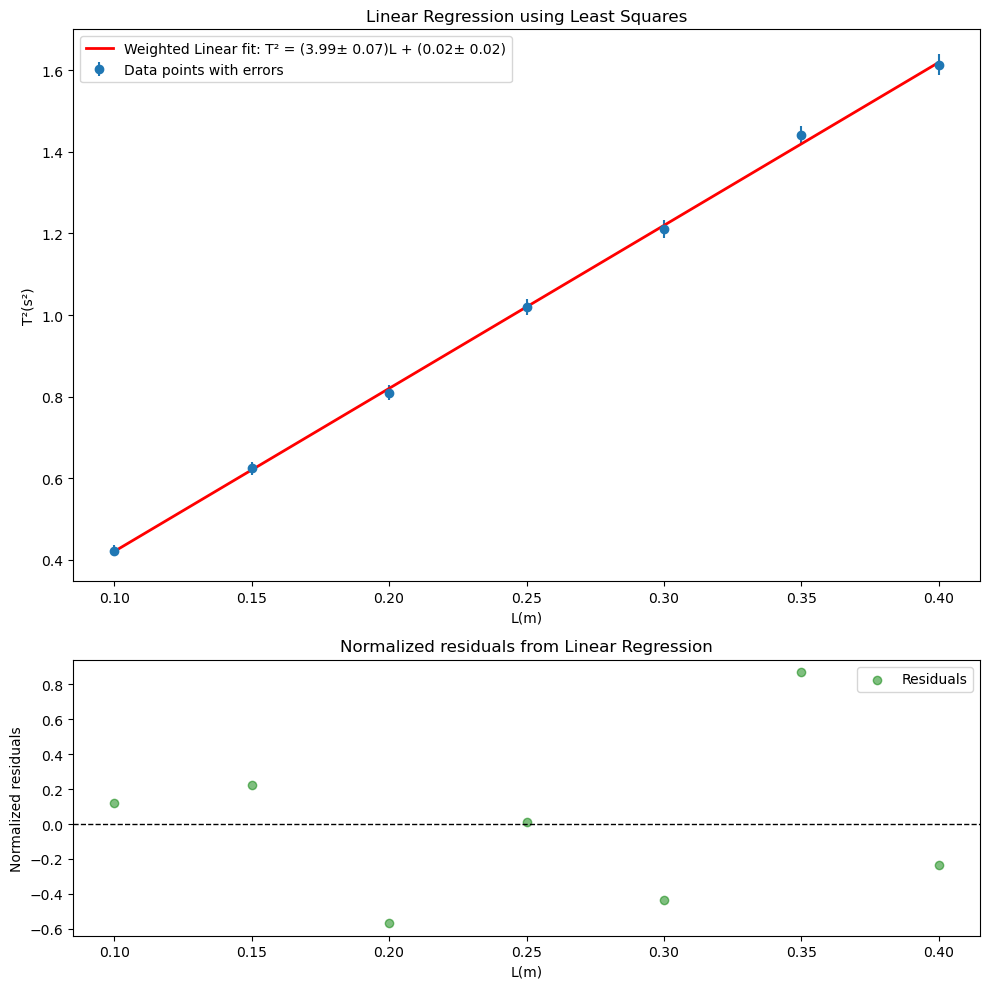

In [2]:
x = data['L (m)']
y = data['T (s)']**2
xerr = data['Delta L (m)']
yerr = 2 * data['T (s)'] * data['Delta T (s)']

# Calculate weights
weights = 1 / yerr**2

# Calculate sums needed for slope and intercept
sum_w = weights.sum()
sum_wx = (weights * x).sum()
sum_wy = (weights * y).sum()
sum_wxx = (weights * x**2).sum()
sum_wxy = (weights * x * y).sum()

# Calculate weighted slope (a) and intercept (b)
slope = (sum_w * sum_wxy - sum_wx * sum_wy) / (sum_w * sum_wxx - sum_wx**2)
intercept = (sum_wxx * sum_wy - sum_wx * sum_wxy) / (sum_w * sum_wxx - sum_wx**2)

# Calculate standard errors (uncertainties)
slope_std_err = np.sqrt(sum_w / (sum_w * sum_wxx - sum_wx**2))
intercept_std_err = np.sqrt(sum_wxx / (sum_w * sum_wxx - sum_wx**2))

# Predict the Y values
y_pred = slope * x + intercept

# Calculate normalized residuals
residuals = (y - y_pred)/yerr


print(f"Slope (a): {slope} ± {slope_std_err}")
print(f"Intercept (b): {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")
print("g exp: ", "(", (4*np.pi**2)/(slope), "±", (4*np.pi**2)/(slope**2)*slope_std_err, ")m/s²")


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr,  fmt='o', label='Data points with errors')
ax1.plot(x, y_pred, color='red', linewidth=2, label=f'Weighted Linear fit: T² = ({slope:.2f}± {slope_std_err:.2f})L + ({intercept:.2f}± {intercept_std_err:.2f})')

ax1.set_xlabel('L(m)')
ax1.set_ylabel('T²(s²)')
ax1.legend(loc='upper left')
ax1.set_title('Linear Regression using Least Squares')

# Plot normalized residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('L(m)')
ax2.set_ylabel('Normalized residuals')
ax2.legend(loc='upper right')
ax2.set_title('Normalized residuals from Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Weighted_linear_regression_with_normalized_residuals_least_squares.pdf', format='pdf')
plt.show()


